In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
fake=pd.read_csv('https://raw.githubusercontent.com/mehra-dimple/Social-Media-Fake-News-Detection/main/Data/politifact_fake.csv')
fake

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...
...,...,...,...,...
427,politifact14944,http://thehill.com/homenews/senate/369928-who-...,Who is affected by the government shutdown?,954602090462146560\t954602093171609600\t954650...
428,politifact14071,https://web.archive.org/web/20170322070001/htt...,Lindsey Graham Threatens To Convert To Democra...,740351669834244096\t740391312277573632\t740474...
429,politifact13577,http://archive.is/DQqCx,ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...,810939651900907520\t814738996706164737\t814917...
430,politifact13560,politicono.com/palin-calls-boycott-mall-americ...,Sarah Palin Calls To Boycott Mall Of America B...,805216591424212993\t805222830023540736\t805223...


In [3]:
true=pd.read_csv('https://raw.githubusercontent.com/mehra-dimple/Social-Media-Fake-News-Detection/main/Data/politifact_real.csv')
true

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...
...,...,...,...,...
619,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN
620,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...
621,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN
622,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874


In [4]:
fake['target'] = 'fake'
true['target'] = 'true'

In [5]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape
data

,id,news_url,title,tweet_ids,target
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,fake
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,fake
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,fake
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,fake
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,fake
...,...,...,...,...,...
1051,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN,true
1052,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...,true
1053,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN,true
1054,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,true


In [6]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [7]:
data.head(10)

,id,news_url,title,tweet_ids,target
0,politifact13745,https://web.archive.org/web/20170217234839/htt...,GOP Official Who Says America Needs ?Another 9...,NaN,fake
1,politifact2131,http://www.msnbc.msn.com/id/38384219/ns/meet_t...,"Outlook, Office, Skype, Bing, Breaking News, a...",35400526656970752\t121603918479376384\t2025703...,true
2,politifact3320,https://web.archive.org/web/20100405072544/htt...,United States Senator Jim DeMint,NaN,true
3,politifact13548,http://time.com/4523755/donald-trump-leaked-ta...,"Donald Trump, Billy Bush: Interview Scrambles ...",784585118174351362\t784587088297619456\t784588...,true
4,politifact741,NaN,“Put Palin’s WolfKilling Record on Television”,919129974,true
5,politifact14490,http://disaster.trendolizer.com/2017/08/breaki...,BREAKING NEWS: Prince William and Harry donate...,NaN,fake
6,politifact409,http://www.mtv.com/news/articles/1583539/20080...,Bill Clinton Says He 'Never Said A Bad Word Ab...,NaN,true
7,politifact1176,http://www.washingtonpost.com/wp-dyn/content/a...,Why the Public Option Isn't the Only Answer to...,NaN,true
8,politifact2128,http://abcnews.go.com/ThisWeek/week-transcript...,'This Week' Transcript: Geithner,12043573152\t12044834853\t162367777368326144\t...,true
9,politifact15301,http://bitcoingrower.life/2018/04/15/apply-now...,Account Suspended,991060018618347526,fake


In [8]:
data.drop(["news_url"],axis=1,inplace=True)
data.head()

,id,title,tweet_ids,target
0,politifact13745,GOP Official Who Says America Needs ?Another 9...,NaN,fake
1,politifact2131,"Outlook, Office, Skype, Bing, Breaking News, a...",35400526656970752\t121603918479376384\t2025703...,true
2,politifact3320,United States Senator Jim DeMint,NaN,true
3,politifact13548,"Donald Trump, Billy Bush: Interview Scrambles ...",784585118174351362\t784587088297619456\t784588...,true
4,politifact741,“Put Palin’s WolfKilling Record on Television”,919129974,true


In [9]:
data.drop(["tweet_ids"],axis=1,inplace=True)
data.head()

,id,title,target
0,politifact13745,GOP Official Who Says America Needs ?Another 9...,fake
1,politifact2131,"Outlook, Office, Skype, Bing, Breaking News, a...",true
2,politifact3320,United States Senator Jim DeMint,true
3,politifact13548,"Donald Trump, Billy Bush: Interview Scrambles ...",true
4,politifact741,“Put Palin’s WolfKilling Record on Television”,true


In [10]:
data['title']=data['title'].apply(lambda  x: x.lower())
data.head()

,id,title,target
0,politifact13745,gop official who says america needs ?another 9...,fake
1,politifact2131,"outlook, office, skype, bing, breaking news, a...",true
2,politifact3320,united states senator jim demint,true
3,politifact13548,"donald trump, billy bush: interview scrambles ...",true
4,politifact741,“put palin’s wolfkilling record on television”,true


In [11]:
labels=data.target
labels.head()

0    fake
1    true
2    true
3    true
4    true
Name: target, dtype: object

In [12]:
target=data.target.value_counts()
target

true    624
fake    432
Name: target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


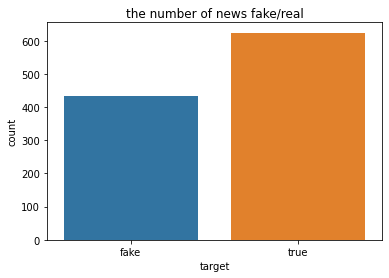

In [13]:
sns.countplot(data.target)
plt.title('the number of news fake/real');

In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['title'] = data['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
data.head(9)

,id,title,target
0,politifact13745,gop official says america needs ?another 9/11?...,fake
1,politifact2131,"outlook, office, skype, bing, breaking news, l...",true
2,politifact3320,united states senator jim demint,true
3,politifact13548,"donald trump, billy bush: interview scrambles ...",true
4,politifact741,“put palin’s wolfkilling record television”,true
5,politifact14490,breaking news: prince william harry donates $1...,fake
6,politifact409,bill clinton says 'never said bad word senator...,true
7,politifact1176,public option answer health-care reform,true
8,politifact2128,'this week' transcript: geithner,true


id
politifact100      1
politifact1013     1
politifact1014     1
politifact10185    1
politifact1019     1
                  ..
politifact986      1
politifact99       1
politifact997      1
politifact998      1
politifact999      1
Name: title, Length: 1054, dtype: int64


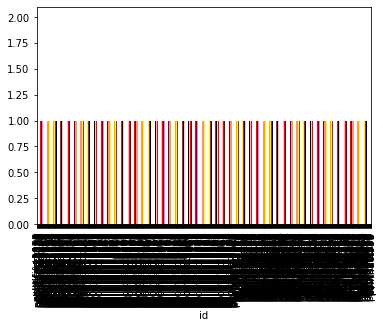

In [16]:
print(data.groupby(['id'])['title'].count())
data.groupby(['id'])['title'].count().plot(kind="bar",color=['yellow','Pink','violet','Brown','Red','Orange','Black','Maroon'])
plt.show()

target
fake    432
true    624
Name: title, dtype: int64


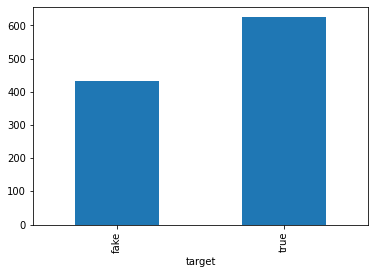

In [17]:
print(data.groupby(['target'])['title'].count())
data.groupby(['target'])['title'].count().plot(kind="bar")
plt.show()

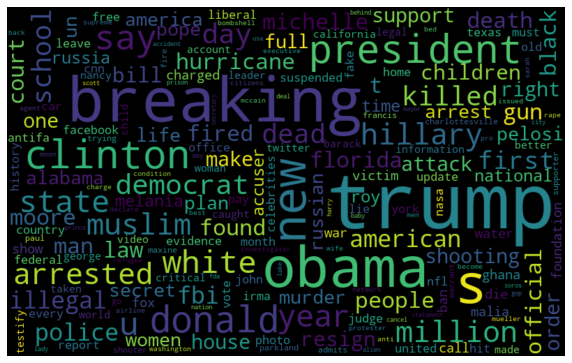

In [18]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([title for title in fake_data.title])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

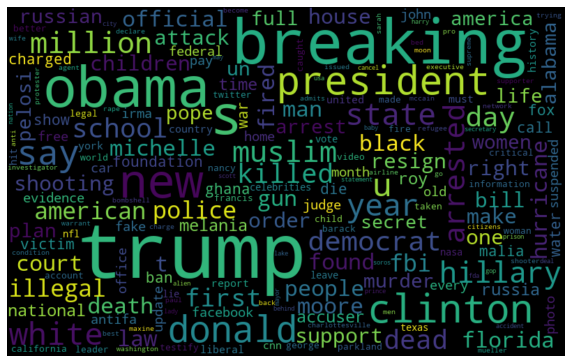

In [19]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([title for title in fake_data.title])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

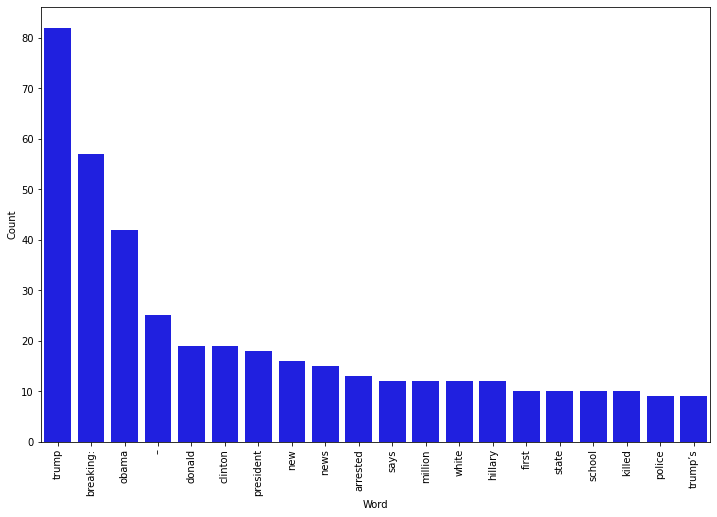

In [21]:
counter(data[data["target"] == "fake"], "title", 20)

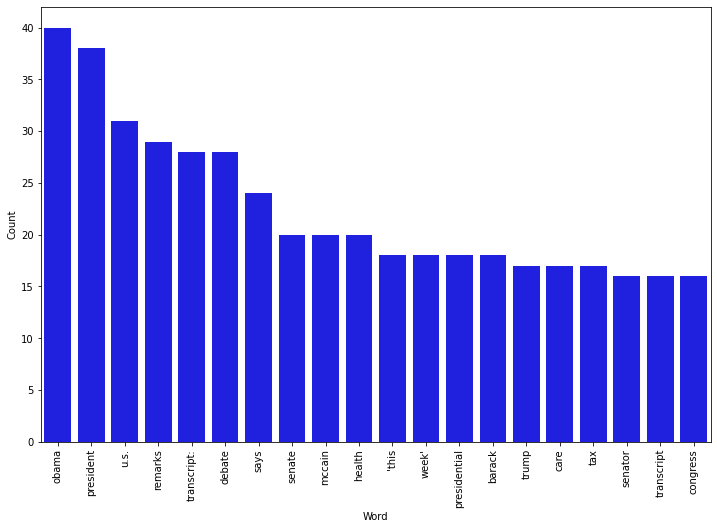

In [22]:
counter(data[data["target"] == "true"], "title", 20)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(data['title'], labels, test_size=0.2, random_state=7)

In [24]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [25]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 82.55%


In [26]:
x = np.array(data["title"])
y = np.array(data["target"])

cv = CountVectorizer()
x = cv.fit_transform(x)

In [27]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.8537735849056604


In [29]:
news_headline = "National Federation of Independent Business"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['true']


In [30]:
news_headline = "CA Exams 2021: Supreme Court asks ICAI to extend opt-out option for July exams, final order tomorrow"
data = cv.transform([news_headline]).toarray()
print(model.predict(data))

['fake']


In [36]:
from google.colab import drive
drive.mount('/drive')
import pickle

pickle.dump(model, open("/drive/MyDrive/model.pkl", "wb"))  # Save model
pickle.dump(cv, open("/drive/MyDrive/cv.pkl", "wb"))        # Save cv

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
